<a href="https://colab.research.google.com/github/tanyamediratta/Brain_Tumor_Classification/blob/main/Brain_tumor_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
!pip install opencv-python

In [3]:
from ast import increment_lineno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, shutil
import cv2
import matplotlib.image as mpimg
%matplotlib inline
plt.style.use('ggplot')


In [7]:
import zipfile
z=zipfile.ZipFile('/content/archive.zip')
z.extractall()

In [8]:
folder='brain_tumor_dataset/yes/'
count=1
for filename in os.listdir(folder):
  source=folder+filename
  destination=folder+"y"+str(count)+".jpg"
  os.rename(source,destination)
  count+=1
print("all files have been renamed in the yes directory")

all files have been renamed in the yes directory


In [9]:
folder='brain_tumor_dataset/no/'
count=1
for filename in os.listdir(folder):
  source=folder+filename
  destination=folder+"n"+str(count)+".jpg"
  os.rename(source,destination)
  count+=1
print("all files have been renamed in the no directory")

all files have been renamed in the no directory


EXPLORATORY DATA ANALYSIS (EDA)

In [10]:
listyes=os.listdir("brain_tumor_dataset/yes/")
number_files_yes=len(listyes)
print(number_files_yes)

listno=os.listdir("brain_tumor_dataset/no/")
number_files_no=len(listyes)
print(number_files_no)

155
155


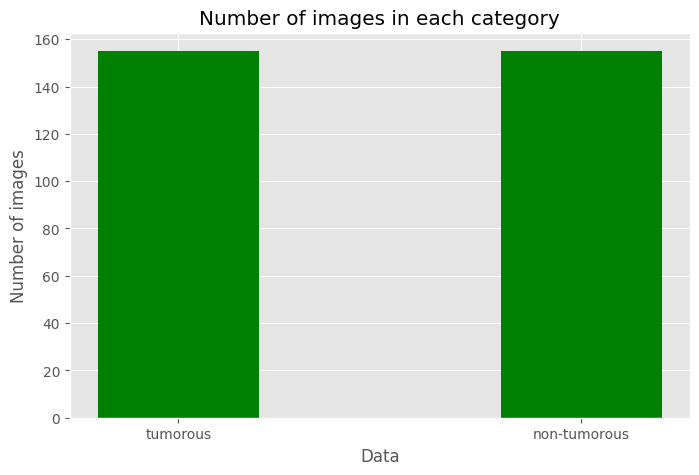

In [11]:
data={'tumorous':number_files_yes,'non-tumorous':number_files_no}
typex=data.keys()
values=data.values()
fig=plt.figure(figsize=(8,5))
plt.bar(typex,values,color='green',width=0.4)
plt.xlabel("Data")
plt.ylabel("Number of images")
plt.title("Number of images in each category")
plt.show()

Data Augmention (increase the size of dataset)

In [12]:
!pip install tensorflow

In [13]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD ,Adam
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [14]:
def timing(sec_elapsed):
  h=int(sec_elapsed/(60*60))
  m=int((sec_elapsed%(60*60))/60)
  s=sec_elapsed%60
  return f"{h}:{m}:{round(s,1)}"

In [15]:
def augmented_data(file_dir,n_generated_samples,save_to_dir):
  data_gen=ImageDataGenerator(rotation_range=10,
                              width_shift_range=0.2,
                              shear_range=0.2,
                              zoom_range=0.2,
                              horizontal_flip=True,
                              vertical_flip=True,

                              fill_mode='nearest',
                              brightness_range=(0.5,1.2)
                            )
  # Iterate through files in the directory
  for filename in os.listdir(file_dir):
    # Load and reshape the image
    image=cv2.imread(file_dir+'/'+filename)
    image=image.reshape((1,)+image.shape)
    save_prefix='aug_'+filename[:-4]
    i=0
    # Generate augmented images and save them
    for batch in data_gen.flow(x=image,batch_size=1,save_to_dir=save_to_dir,save_prefix=save_prefix,save_format='jpg'):
      i+=1
      if i>n_generated_samples:
        break



In [16]:
import time
import os
start_time=time.time()


yes_path='brain_tumor_dataset/yes/'
no_path='brain_tumor_dataset/no/'
augmented_data_path='augmented_data/'

# Create the directories if they don't exist
os.makedirs(augmented_data_path + 'yes', exist_ok=True)
os.makedirs(augmented_data_path + 'no', exist_ok=True)

augmented_data(file_dir=yes_path,n_generated_samples=6,save_to_dir=augmented_data_path+'yes')
augmented_data(file_dir=no_path,n_generated_samples=9,save_to_dir=augmented_data_path+'no')
end_time=time.time()
execution_time=(end_time-start_time)
print(f"Elapsed time:{timing(execution_time)}")

Elapsed time:0:2:13.5


In [17]:
def data_summary(main_path):
  yes_path="augmented_data/yes/"
  no_path="augmented_data/no/"

  m_pos=len(os.listdir(yes_path))
  m_neg=len(os.listdir(no_path))
  m=m_pos+m_neg
  pos_per=(m_pos*100.0)/m
  neg_per=(m_neg*100.0)/m
  print(f"Number of examples: {m}")
  print(f"{m_pos} Percentage of positive examples: {pos_per}%,{m_neg} Percentage of negative examples: {neg_per}% ")
data_summary(augmented_data_path)

Number of examples: 2064
1084 Percentage of positive examples: 52.51937984496124%,980 Percentage of negative examples: 47.48062015503876% 


In [18]:
listyes=os.listdir("augmented_data/yes/")
number_files_yes=len(listyes)
print(number_files_yes)

listno=os.listdir("augmented_data/no/")
number_files_no=len(listyes)
print(number_files_no)

1084
1084


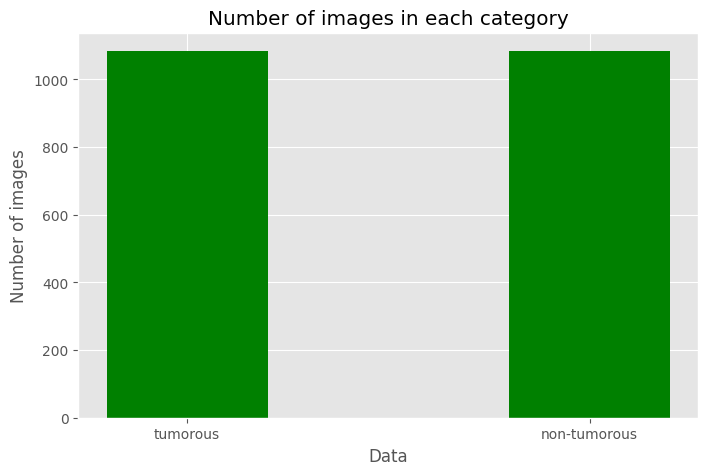

In [19]:
data={'tumorous':number_files_yes,'non-tumorous':number_files_no}
typex=data.keys()
values=data.values()
fig=plt.figure(figsize=(8,5))
plt.bar(typex,values,color='green',width=0.4)
plt.xlabel("Data")
plt.ylabel("Number of images")
plt.title("Number of images in each category")
plt.show()

DATA PREPROCESSING

In [20]:
!pip install imutils

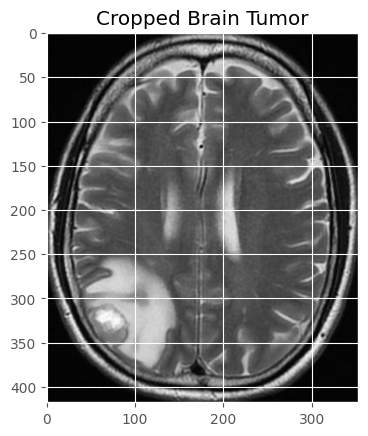

array([[[4, 4, 4],
        [2, 2, 2],
        [3, 3, 3],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [4, 4, 4]],

       [[2, 2, 2],
        [3, 3, 3],
        [4, 4, 4],
        ...,
        [5, 5, 5],
        [4, 4, 4],
        [3, 3, 3]],

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [5, 5, 5],
        [4, 4, 4],
        [3, 3, 3]],

       ...,

       [[4, 4, 4],
        [4, 4, 4],
        [4, 4, 4],
        ...,
        [4, 4, 4],
        [3, 3, 3],
        [3, 3, 3]],

       [[3, 3, 3],
        [4, 4, 4],
        [3, 3, 3],
        ...,
        [5, 5, 5],
        [4, 4, 4],
        [4, 4, 4]],

       [[4, 4, 4],
        [3, 3, 3],
        [5, 5, 5],
        ...,
        [4, 4, 4],
        [4, 4, 4],
        [5, 5, 5]]], dtype=uint8)
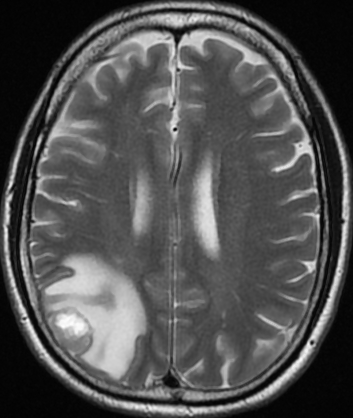

In [21]:
import imutils
def crop_brain_tumour(image,plot=False):
  gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  gray=cv2.GaussianBlur(gray,(5,5),0)
  thresh=cv2.threshold(gray,45,255,cv2.THRESH_BINARY)[1]
  thresh=cv2.erode(thresh,None,iterations=2)
  thresh=cv2.dilate(thresh,None,iterations=2)
  cnts=cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
  cnts=imutils.grab_contours(cnts)
  c=max(cnts,key=cv2.contourArea)
  # Get the bounding rectangle coordinates and convert them to integers
  x, y, w, h = cv2.boundingRect(c)
  # Extract the brain tumor region using integer indices
  new_image = image[y:y + h, x:x + w]

  # If plot is True, display the cropped image (optional)
  if plot:
    plt.imshow(new_image)
    plt.title("Cropped Brain Tumor")
    plt.show()
  return new_image  # Return the cropped image

img=cv2.imread('brain_tumor_dataset/yes/y1.jpg')

crop_brain_tumour(img,True)


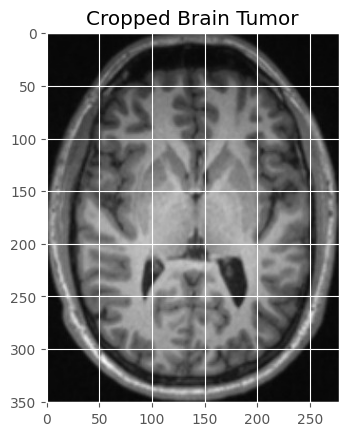

array([[[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8]],

       [[ 8,  8,  8],
        [ 8,  8,  8],
        [ 8,  8,  8],
        ...,
        [ 8,  8,  8],
        [ 9,  9,  9],
        [ 8,  8,  8]],

       [[ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8],
        ...,
        [ 9,  9,  9],
        [ 9,  9,  9],
        [ 8,  8,  8]],

       ...,

       [[11, 11, 11],
        [10, 10, 10],
        [ 9,  9,  9],
        ...,
        [10, 10, 10],
        [ 8,  8,  8],
        [ 7,  7,  7]],

       [[11, 11, 11],
        [11, 11, 11],
        [10, 10, 10],
        ...,
        [11, 11, 11],
        [10, 10, 10],
        [ 9,  9,  9]],

       [[11, 11, 11],
        [10, 10, 10],
        [10, 10, 10],
        ...,
        [10, 10, 10],
        [ 9,  9,  9],
        [ 8,  8,  8]]], dtype=uint8)
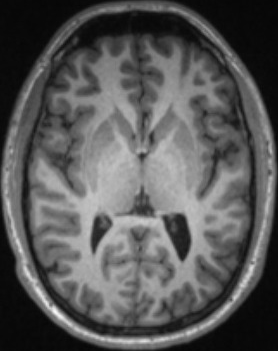

In [22]:
img=cv2.imread('brain_tumor_dataset/no/n1.jpg')

crop_brain_tumour(img,True)

In [23]:
folder1='augmented_data/no/'
folder2='augmented_data/yes/'
for filename in os.listdir(folder1):
  image=cv2.imread(folder1+filename)
  image=crop_brain_tumour(image,plot=False)
  cv2.imwrite(folder1+filename,image)
for filename in os.listdir(folder2):
  image=cv2.imread(folder2+filename)
  image=crop_brain_tumour(image,plot=False)
  cv2.imwrite(folder2+filename,image)

In [24]:

from sklearn.utils import shuffle
import cv2
import os

def load_data(dir_list,image_size):
  X=[]
  Y=[]
  image_width,image_height=image_size
  for directory in dir_list:
    for filename in os.listdir(directory):
      image=cv2.imread(directory+'/'+filename)
      image=crop_brain_tumour(image,plot=False)
      image=cv2.resize(image,dsize=(image_width,image_height),interpolation=cv2.INTER_CUBIC)
      image=image/255
      X.append(image)
      if directory[-3:]=='yes':
        Y.append([1])
      else:
        Y.append([0])
  x=np.array(X)
  y=np.array(Y)
  x,y=shuffle(x,y)
  print(f'Number of examples is:{len(x)}')
  print(f'x shape is:{x.shape}')
  print(f'y shape is:{y.shape}')
  return x,y

augmented_path='augmented_data/'
yes=augmented_path+'yes'
no=augmented_path+'no'
IMG_WIDTH,IMG_HEIGHT=(240,240)
x,y=load_data([yes,no],(IMG_WIDTH,IMG_HEIGHT))

Number of examples is:2064
x shape is:(2064, 240, 240, 3)
y shape is:(2064, 1)


DATA SPLITTING
(train->test->validation)

In [25]:
if not os.path.isdir('tumorous_and_non_tumorous'):
  base_dir='tumorous_and_non_tumorous/'
  os.makedirs(base_dir)




In [26]:
if not os.path.isdir('tumorous_and_non_tumorous/train'):

  train_dir=os.path.join(base_dir,'train')
  os.makedirs(train_dir)


if not os.path.isdir('tumorous_and_non_tumorous/test'):
  test_dir=os.path.join(base_dir,'test')
  os.makedirs(test_dir)


if not os.path.isdir('tumorous_and_non_tumorous/valid'):
  valid_dir=os.path.join(base_dir,'valid')
  os.makedirs(valid_dir)




In [29]:
if not os.path.isdir('tumorous_and_non_tumorous/train/tumorous'):
  infected_train_dir=os.path.join(train_dir,'tumorous')
  os.makedirs(infected_train_dir)
if not os.path.isdir('tumorous_and_non_tumorous/test/tumorous'):
  infected_test_dir=os.path.join(test_dir,'tumorous')
  os.makedirs(infected_test_dir)
if not os.path.isdir('tumorous_and_non_tumorous/valid/tumorous'):
  infected_valid_dir=os.path.join(valid_dir,'tumorous')
  os.makedirs(infected_valid_dir)

In [30]:
if not os.path.isdir('tumorous_and_non_tumorous/train/nontumorous'):
  os.path.join(train_dir,'nontumorous')
  os.makedirs(os.path.join(train_dir,'nontumorous'))
if not os.path.isdir('tumorous_and_non_tumorous/test/nontumorous'):
  os.path.join(test_dir,'nontumorous')
  os.makedirs(os.path.join(test_dir,'nontumorous'))
if not os.path.isdir('tumorous_and_non_tumorous/valid/nontumorous'):
  os.path.join(valid_dir,'nontumorous')
  os.makedirs(os.path.join(valid_dir,'nontumorous'))

In [31]:
original_dataset_tumorous=os.path.join('augmented_data','yes/')
original_dataset_nontumorous=os.path.join('augmented_data','no/')

In [32]:
files=os.listdir('augmented_data/yes/')
fnames=[]
for i in range(0,759):
  fnames.append(files[i])
for fname in fnames:
  src=os.path.join(original_dataset_tumorous,fname)
  dst=os.path.join(train_dir,'tumorous',fname)
  shutil.copyfile(src,dst)

In [33]:
files=os.listdir('augmented_data/yes/')
fnames=[]
for i in range(759,922):
  fnames.append(files[i])
for fname in fnames:
  src=os.path.join(original_dataset_tumorous,fname)
  dst=os.path.join(test_dir,'tumorous',fname)
  shutil.copyfile(src,dst)

In [35]:
files=os.listdir('augmented_data/yes/')
fnames=[]
for i in range(922,1084):
  fnames.append(files[i])
for fname in fnames:
  src=os.path.join(original_dataset_tumorous,fname)
  dst=os.path.join(valid_dir,'tumorous',fname)
  shutil.copyfile(src,dst)

80% dataset for training , 10%for testing ,10% for validation

In [36]:
files=os.listdir('augmented_data/no/')
fnames=[]
for i in range(0,686):
  fnames.append(files[i])
for fname in fnames:
  src=os.path.join(original_dataset_nontumorous,fname)
  dst=os.path.join(train_dir,'nontumorous',fname)
  shutil.copyfile(src,dst)

In [37]:
files=os.listdir('augmented_data/no/')
fnames=[]
for i in range(686,833):
  fnames.append(files[i])
for fname in fnames:
  src=os.path.join(original_dataset_nontumorous,fname)
  dst=os.path.join(test_dir,'nontumorous',fname)
  shutil.copyfile(src,dst)

In [38]:
files=os.listdir('augmented_data/no/')
fnames=[]
for i in range(833,979):
  fnames.append(files[i])
for fname in fnames:
  src=os.path.join(original_dataset_nontumorous,fname)
  dst=os.path.join(valid_dir,'nontumorous',fname)
  shutil.copyfile(src,dst)

MODEL BUILDING

In [39]:
train_data_gen=ImageDataGenerator(rescale=1./255,
                   horizontal_flip=.4,
                   vertical_flip=.4,
                   width_shift_range=.4,
                   height_shift_range=.4,
                   rotation_range=40,
                   shear_range=.2,
                   fill_mode='nearest'
                  )
test_data_gen=ImageDataGenerator(rescale=1./255)
valid_data_gen=ImageDataGenerator(rescale=1./255)

In [40]:
train_generator=train_data_gen.flow_from_directory('tumorous_and_non_tumorous/train/',batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')


Found 1445 images belonging to 2 classes.


In [41]:
test_generator=train_data_gen.flow_from_directory('tumorous_and_non_tumorous/test/',batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')


Found 310 images belonging to 2 classes.


In [42]:
valid_generator=train_data_gen.flow_from_directory('tumorous_and_non_tumorous/valid/',batch_size=32,target_size=(240,240),class_mode='categorical',shuffle=True,seed=42,color_mode='rgb')


Found 308 images belonging to 2 classes.


In [43]:
class_labels=train_generator.class_indices
class_name={value:key for (key, value)in class_labels.items()}
print(class_name)

{0: 'nontumorous', 1: 'tumorous'}


In [44]:
base_model=VGG19(include_top=False,weights='imagenet',input_shape=(240,240,3))
for layers in base_model.layers:
  layers.trainable=False
x=base_model.output
flat=Flatten()(x)
class_1=Dense(4608,activation='relu')(flat)
drop_out=Dropout(0.2)(class_1)
class_2=Dense(1152,activation='relu')(drop_out)
output=Dense(2,activation='softmax')(class_2)
model_01=Model(inputs=base_model.input,outputs=output)
model_01.summary()

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 120,921,986 (461.28 MB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [45]:
#callback
filepath='model_01.h5'
es=EarlyStopping(monitor='val_loss',patience=10,verbose=1,min_delta=0.0007)
mc=ModelCheckpoint(filepath,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
reduce_lr=ReduceLROnPlateau(monitor='val_accuracy',factor=0.5,patience=2,verbose=1,min_lr=0.0001)

In [46]:
sgd=SGD(learning_rate=0.0001,decay=1e-6,momentum=.9,nesterov=True)
model_01.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [47]:
history_01=model_01.fit(train_generator,epochs=1,steps_per_epoch=10,validation_data=valid_generator,callbacks=[es,mc,reduce_lr])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31s/step - accuracy: 0.4880 - loss: 0.7571 
Epoch 1: val_loss improved from inf to 0.69496, saving model to model_01.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 617s 65s/step - accuracy: 0.4874 - loss: 0.7563 - val_accuracy: 0.5000 - val_loss: 0.6950 - learning_rate: 1.0000e-04


In [49]:
if not  os.path.isdir('model_weigths/'):
  os.mkdir('model_weigths/')
model_01.save_weights(filepath="model_weigths/vgg19_model_01.weights.h5",overwrite=True)

In [51]:
model_01.load_weights('model_weigths/vgg19_model_01.weights.h5')
a=model_01.evaluate(valid_generator)
b=model_01.evaluate(test_generator)


10/10 ━━━━━━━━━━━━━━━━━━━━ 331s 33s/step - accuracy: 0.4881 - loss: 0.6933


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 310s 31s/step - accuracy: 0.5540 - loss: 0.6954


In [53]:
print('validation loss:{a[0]}')
print('validation accuracy:{a[1]}')
print('testing loss:{b[0]}')
print('testing accuracy:{b[1]}')

validation loss:{a[0]}
validation accuracy:{a[1]}
testing loss:{b[0]}
testing accuracy:{b[1]}


In [ ]:
#filename=test_generator.filenames
#nb_samples=len(filename)
#model_01.predict(test_generator,steps=nb_samples,verbose=1)
#y_pred=np.argmax(vgg_prediction_01,axis=1)
#print(y_pred)

incremental unfeezing and fine-tuning

In [58]:
base_model=VGG19(include_top=False,input_shape=(240,240,3))
base_model_layers_names=[layer.name for layer in base_model.layers]
base_model_layers_names
x=base_model.output
flat=Flatten()(x)
x=base_model.output
flat=Flatten()(x)
class_1=Dense(4608,activation='relu')(flat)
drop_out=Dropout(0.2)(class_1)
class_2=Dense(1152,activation='relu')(drop_out)
output=Dense(2,activation='softmax')(class_2)
model_02=Model(inputs=base_model.inputs,outputs=output)
model_02.load_weights('model_weigths/vgg19_model_01.weights.h5')
set_trainable=False
for layer in model_02.layers:
  if layer.name in ['block5_conv4','block5_conv3']:
    set_trainable=True
  if set_trainable:
    layer.trainable=True
  else:
    layer.trainable=False
model_02.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 125,641,602 (479.28 MB)

 Non-trainable params: 15,304,768 (58.38 MB)

In [56]:
sgd=SGD(learning_rate=0.0001,decay=1e-6,momentum=.9,nesterov=True)
model_02.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [57]:
history_02=model_01.fit(train_generator,epochs=1,steps_per_epoch=10,validation_data=valid_generator,callbacks=[es,mc,reduce_lr])

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 33s/step - accuracy: 0.5622 - loss: 0.6991 
Epoch 1: val_loss improved from 0.69496 to 0.67833, saving model to model_01.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 624s 66s/step - accuracy: 0.5602 - loss: 0.7008 - val_accuracy: 0.5552 - val_loss: 0.6783 - learning_rate: 1.0000e-04


In [61]:
if not  os.path.isdir('model_weigths/'):
  os.mkdir('model_weigths/')
model_02.save_weights(filepath="model_weigths/vgg19_model_02.weights.h5",overwrite=True)

In [62]:
# Compile the model_02 before evaluating it
sgd = SGD(learning_rate=0.0001, decay=1e-6, momentum=.9, nesterov=True)
model_02.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Now you can evaluate the model
model_02.load_weights('model_weigths/vgg19_model_02.weights.h5')
a = model_02.evaluate(valid_generator)
b = model_02.evaluate(test_generator)

/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 2 variables whereas the saved optimizer has 0 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_77']
Received: inputs=Tensor(shape=(None, 240, 240, 3))
  warnings.warn(msg)


10/10 ━━━━━━━━━━━━━━━━━━━━ 292s 29s/step - accuracy: 0.5526 - loss: 0.6910
10/10 ━━━━━━━━━━━━━━━━━━━━ 318s 31s/step - accuracy: 0.5443 - loss: 0.6944


In [ ]:
#unfreezing  the entire network

In [63]:
base_model=VGG19(include_top=False,input_shape=(240,240,3))
base_model_layers_names=[layer.name for layer in base_model.layers]
base_model_layers_names
x=base_model.output
flat=Flatten()(x)
x=base_model.output
flat=Flatten()(x)
class_1=Dense(4608,activation='relu')(flat)
drop_out=Dropout(0.2)(class_1)
class_2=Dense(1152,activation='relu')(drop_out)
output=Dense(2,activation='softmax')(class_2)
model_03=Model(inputs=base_model.inputs,outputs=output)
model_03.load_weights('model_weigths/vgg19_model_01.weights.h5')
sgd=SGD(learning_rate=0.0001,decay=1e-6,momentum=.9,nesterov=True)
model_03.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])


In [64]:
model_03.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 240, 240, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 240, 240, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 240, 240, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 120, 120, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 120, 120, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 120, 120, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 60, 60, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 60, 60, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 60, 60, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 30, 30, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 30, 30, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 30, 30, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 15, 15, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 15, 15, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 140,946,370 (537.67 MB)

 Trainable params: 140,946,370 (537.67 MB)

 Non-trainable params: 0 (0.00 B)

In [69]:
history_03=model_03.fit(train_generator,epochs=1,steps_per_epoch=10,validation_data=valid_generator,callbacks=[es,mc,reduce_lr])
# The model weights are saved to 'model_01.h5' by the ModelCheckpoint callback (mc).
# If you intend to save to 'model_weigths/vgg19_unfrozen.weights.h5', adjust the filepath in the ModelCheckpoint callback.
# For now, loading from the saved location:
model_03.load_weights('model_01.h5')
a=model_03.evaluate(valid_generator)
b=model_03.evaluate(test_generator)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 102s/step - accuracy: 0.5336 - loss: 0.7011  
Epoch 1: val_loss improved from 0.67833 to 0.66320, saving model to model_01.h5


10/10 ━━━━━━━━━━━━━━━━━━━━ 1330s 136s/step - accuracy: 0.5360 - loss: 0.7006 - val_accuracy: 0.6071 - val_loss: 0.6632 - learning_rate: 1.0000e-04
10/10 ━━━━━━━━━━━━━━━━━━━━ 278s 28s/step - accuracy: 0.5900 - loss: 0.6723
10/10 ━━━━━━━━━━━━━━━━━━━━ 285s 28s/step - accuracy: 0.5769 - loss: 0.6748
